# Wiederholung: pandapipes-Netze erstellen

Dieses Tutorial wiederholt die wichtigsten Schritte für die Netzerstellung, ergänzt aber weitere wichtige Eingabeparameter und zeigt außerdem, wie man Netzwerke plotten kann.

<img src="pics/rng_height.png">

Die pandapipes-Umgebung basiert auf der Python-Bibliothek "pandas". Ein Netzwerk enthält Tabellen für jeden Komponententyp, der eingesetzt wird. Die Zeilen der Tabellen entsprechen den tatsächlich im Netzwerk vorhandenen Komponenten. Jede Zeile in einer Komponententabelle repräsentiert also eine Komponente des jeweiligen Typs. Die Spalten entsprechen den Eigenschaften des Komponententyps.

Durch das Ausführen der folgenden Code-Zellen des Notebooks werden die für das betrachtete Netz benötigten Komponententabellen erstellt. Wenn Sie weitere Informationen zu den einzelnen Parametern der Komponenten benötigen, so finden Sie diese in der pandapipes-Dokumentation unter Punkt "Datastructure and Components".


### Leeres Netzwerk

Zunächst wird pandapipes importiert und ein leeres Netzwerk erzeugt und ein Fluid hinzugefügt. Wir greifen auf die in pandapipes vorhandene Bibliothek zu und wählen Wasser als Fluid:


In [1]:
import pandapipes as pp

In [2]:
net = pp.create_empty_network(fluid="water") # create an empty network

Die <span style="color:blue">create</span>-Funktionen werden nun eingesetzt, um neue Komponenten zu erzeugen. Diese werden automatisch den entsprechenden Tabellen hinzugefügt. 

### Junctions

In [3]:
junction1 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 352, name="Junction 1")
junction2 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 358, name="Junction 2")
junction3 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 361, name="Junction 3")
junction4 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 346, name="Junction 4")
junction5 = pp.create_junction(net, pn_bar=1.0, tfluid_k=293.15, height_m = 400, name="Junction 5")

Die junctions befinden sich jetzt im Netz-Container und können abgerufen werden. Einigen Parametern, die beim Funktionsaufruf nicht explizit erwähnt worden sind, wurden Standardwerte zugewiesen. Beachten Sie: Im Vergleich zum Einführungstutorial wurde den Junctions eine Höheninformation hinzugefügt. Die durch Höhenunterschiede vorhandene potentielle Energie wird bei der Hydraulikberechnung berücksichtigt.

In [4]:
net.junction # show junction table

,name,pn_bar,tfluid_k,height_m,in_service,type
0,Junction 1,1.0,293.15,352.0,True,junction
1,Junction 2,1.0,293.15,358.0,True,junction
2,Junction 3,1.0,293.15,361.0,True,junction
3,Junction 4,1.0,293.15,346.0,True,junction
4,Junction 5,1.0,293.15,400.0,True,junction


Im nächsten Schritt werden dem Netz weitere Komponenten hinzugefügt, angefangen beim External Grid:

### External Grid


In unserem Beispiel wird das External Grid mit der Junction-Variable junction5 verbunden. Der Druck beträgt 0.5 bar. In der späteren Auswertung wird der Druck, den Sie an junction5 abrufen, folglich ebenfalls 0.5 bar betragen.


In [5]:
medium_pressure_grid = pp.create_ext_grid(net, junction=junction5, p_bar=0.5, t_k=293.15, name="Grid Connection")

net.ext_grid # show external grid table

,name,junction,p_bar,t_k,in_service,type
0,Grid Connection,4,0.5,293.15,True,pt


### Rohre

Das Netzwerk enthält 4 Rohre, die zwischen je zwei junctions verlaufen. Die Verbindungspunkte und die jeweiligen Rohrlängen sind im Diagramm zu sehen. Die Parameter sind weitgehend bereits bekannt. Beachten Sie aber, dass Rohr 4 eine andere Rauigkeit `k_mm` zugewiesen bekommt. Der Standardwert beträgt 1 mm.



In [6]:
pipe1 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction2, length_km=0.545, diameter_m=0.2,  name="Pipe 1")
pipe2 = pp.create_pipe_from_parameters(net, from_junction=junction2, to_junction=junction3, length_km=0.095, diameter_m=0.15, name="Pipe 2")
pipe3 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction4, length_km=0.285, diameter_m=0.15, name="Pipe 3")
pipe4 = pp.create_pipe_from_parameters(net, from_junction=junction1, to_junction=junction5, length_km=0.43, diameter_m=0.15, k_mm=0.5, name="Pipe 4")


Damit sieht die Tabelle der Rohrkomponenten wie folgt aus:

In [7]:
net.pipe # show pipe table

,name,from_junction,to_junction,std_type,length_km,diameter_m,k_mm,loss_coefficient,alpha_w_per_m2k,text_k,qext_w,sections,in_service,type
0,Pipe 1,0,1,None,0.545,0.20,1.0,0.0,0.0,293.0,0.0,1,True,pipe
1,Pipe 2,1,2,None,0.095,0.15,1.0,0.0,0.0,293.0,0.0,1,True,pipe
2,Pipe 3,0,3,None,0.285,0.15,1.0,0.0,0.0,293.0,0.0,1,True,pipe
3,Pipe 4,0,4,None,0.430,0.15,0.5,0.0,0.0,293.0,0.0,1,True,pipe


Die Parameter from_junction und to_junction geben die Orientierung des Rohrs an. Wenn die Flussrichtung tatsächlich aus Richtung from_junction in Richtung to_junction verläuft, ist das Vorzeichen der berechneten Strömungsgeschwindigkeit positiv. Andernfalls nimmt die Strömungsgeschwindigkeit negative Werte an.

### Senken


Mit Hilfe einer Senke kann eine konstante Abnahme definiert werden. An dieser Stelle wird eine sink-Komponente mit einem Massestrom in Höhe von 545 g/s definiert. Senken und Quellen werden immer einer bestimmten Junction zugeordnet. Das Vorzeichen des Massestroms ist positiv, wenn ein Massestrom aus dem System entnommen wird.


In [8]:
sink = pp.create_sink(net, junction=junction4, mdot_kg_per_s=0.277, name="Sink 1")
sink = pp.create_sink(net, junction=junction3, mdot_kg_per_s=0.139, name="Sink 2")
net.sink

,name,junction,mdot_kg_per_s,scaling,in_service,type
0,Sink 1,3,0.277,1.0,True,sink
1,Sink 2,2,0.139,1.0,True,sink


Wir starten jetzt die Berechnung. Wahrscheinlich ist Ihnen bekannt, dass es mehrere Modelle gibt, um den Reibungseinfluss der Rohrleitungen zu berücksichtigen. Standardmäßig wird das Modell nach Nikuradse verwendet. Eine klare Trennung zwischen laminarer und turbulenter Rohrströmung ist in pandapipes nicht implementiert. Übliche Programme bieten sonst die Möglichkeit, zwischen voll ausgebildeter, laminarer Rohrströmung und turbulenter Strömung zu unterscheiden. Laminare Strömungen sind in den üblichen pandapipes-Anwendungen nicht zu erwarten.

Dennoch ist geplant, eine entsprechende Unterscheidung in Zukunft zu implementieren. Im Pipeflow-Befehl wird an dieser Stelle explizit der Parameter für das Nikuradse-Modell gesetzt, obwohl dies die Standardeinstellung ist. Momentan können Sie den Parameter ignorieren, er wird aber im Rahmen einer Übung wichtig.

In [9]:
pp.pipeflow(net, friction_model ="nikuradse")

Und lassen Ergebnisse anzeigen.

In [10]:
net.res_junction # calculated pressure and temperature at junctions

,p_bar,t_k
0,5.194289,293.15
1,4.607432,293.15
2,4.314000,293.15
3,5.780977,293.15
4,0.500000,293.15


In [11]:
net.res_pipe  # velocities, mass flows through pipes and other results



,v_mean_m_per_s,p_from_bar,p_to_bar,t_from_k,t_to_k,mdot_from_kg_per_s,mdot_to_kg_per_s,vdot_norm_m3_per_s,reynolds,lambda
0,0.004433,5.194289,4.607432,293.15,293.15,0.139,-0.139,0.000139,886.106589,0.102569
1,0.007880,4.607432,4.314000,293.15,293.15,0.139,-0.139,0.000139,1181.475451,0.087337
2,0.015704,5.194289,5.780977,293.15,293.15,0.277,-0.277,0.000278,2354.451079,0.060350
3,-0.023584,5.194289,0.500000,293.15,293.15,-0.416,0.416,-0.000417,3535.926531,0.045036


## Plotting

Mit Hilfe des Python-Moduls matplotlib lassen sich die Netze auch mit wenig Aufwand direkt plotten.

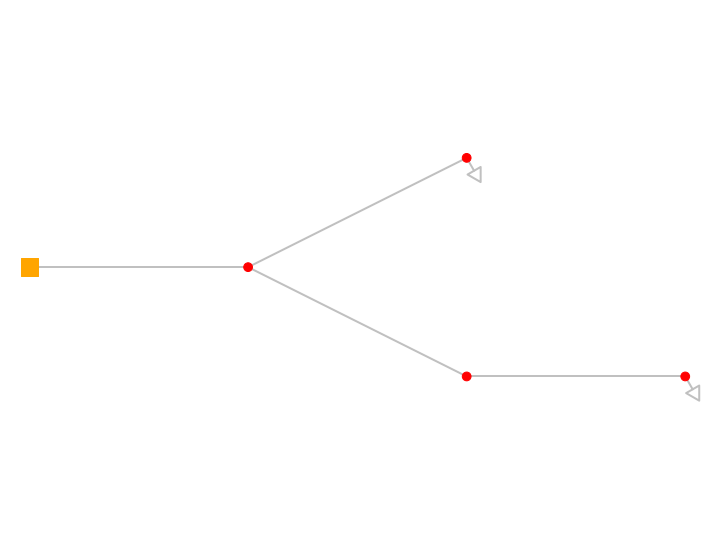

In [15]:
import matplotlib
from pandapipes.plotting.simple_plot import simple_plot as sp

sp(net, plot_sinks = True)

Koordinaten werden den junctions automatisch zugewiesen, solange diese nicht explizit zugewiesen werden.

### Lessons Learned

Nach dem Durcharbeiten des Tutorials sollten Sie:
    
* wissen, wie man Lageinformationen den junctions hinzufügt
- wissen, dass es den Rohrparameter k_mm für die Rauigkeit gibt
- Etwas über das Plotten von Netzen gelernt haben

## Aufgaben

1. Erklären Sie die Druckwerte in der Tabelle `res_junction`
2. Inwieweit beeinflusst der Temperaturparameter das Berechnungsergebnis? Spielt die Temperaturabhängigkeit bei Gasnetzen eine größere Rolle als bei Wassernetzen? 
3. Sind in pandapipes neben Nikuradse weitere Reibungsmodelle implementiert? Finden Sie dies heraus und ändern Sie das Modell ggf.